<a href="https://colab.research.google.com/github/Leonardopedroti/S-ries_Temporais/blob/main/S%C3%A9ries_temporais_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TIME SERIES WITH PYTHON

-----------------------------
SÉRIES TEMPORAIS COM PYTHON

OBJECTIVE: Use of the python tool to obtain precipitation data from organs such as ANA and INMET, using the Hydrobr package.

--------------------------------------------------------------------

OBJETIVO: Utilização da ferramenta python na obtenção de dados de precipitação de orgãos como a ANA e o INMET, a partir do pacote Hydrobr.

##Exemplo: verificando os dados de uma estação. (BURI - SP)

-------------------------------------------------

Example: checking station data.

Step 1: installation of the hydrobr packages (which contains the precipitation data) and the seaborn package (library for plotting graphs).

------------------------------------------------------------------

Passo 1: instalação do pacotes hydrobr (que contém os dados de precipitação) e o pacote seaborn (biblioteca para plotagem de gráficos). 

In [ ]:
!pip install hydrobr
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for hydrobr: filename=hydrobr-0.1.1-py3-none-any.whl size=15090 sha256=381ea6d8ee7e10310895f1b8920243fa674407fd9485b9ecb86ccc14d660fe11
  Stored in directory: /root/.cache/pip/wheels/1e/4e/39/ca79e5e92d5a5dd884af651e5d7d4040114c0b54bfec154090
Successfully built hydrobr
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Step 2: import hydrobr, seaborn and other additional packages.

---------------------------------------------------------------

Passo 2: importação dos pacotes hydrobr, seaborn e outros adicionais.

In [ ]:

import hydrobr
import pandas as pd

from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import plot
from PIL import Image


Step 3: Opening station data - Data related to precipitation

--------------------------------------------------------------

Passo 3: Abrindo os dados das estaçoes - Dados relacionados a precipitações 

In [ ]:

lista_estaçoes = hydrobr.get_data.ANA.list_prec_stations()
lista_estaçoes

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
0,SALINÓPOLIS,00047000,2,32,SALINÓPOLIS,PARÁ,INMET,-0.6500,-47.5500,1958/01/01,1964/12/31,7,25.0,0,100.0
1,SALINÓPOLIS,00047002,2,32,SALINÓPOLIS,PARÁ,ANA,-0.6231,-47.3536,1977/12/09,2019/08/31,43,3.5,35,18.6
2,CURUÇA,00047003,2,32,CURUÇA,PARÁ,ANA,-0.7375,-47.8536,1981/07/01,2019/07/31,39,2.4,29,25.6
3,PRIMAVERA,00047004,2,32,PRIMAVERA,PARÁ,ANA,-0.9294,-47.0994,1982/02/18,2019/08/31,38,0.0,35,7.9
4,MARUDA,00047005,2,32,MARAPANIM,PARÁ,ANA,-0.6336,-47.6583,1989/08/21,2019/07/31,31,5.0,20,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11971,NOVA ESPERANÇA/MARCO BV-8,08461000,2,14,PACARAIMA,RORAIMA,ANA,4.4883,-61.1297,1984/03/23,2019/06/30,36,12.3,13,63.9
11972,MISSÃO AUARIS - JUSANTE,08464001,2,14,BOA VISTA,RORAIMA,ANA,4.0031,-64.4431,1995/04/01,2019/06/30,25,4.2,15,40.0
11973,WILLIAM KRAANPLEIN,08555060,2,90,SURINAME,SURINAME,SURINAME,5.8000,-55.1667,1935/08/01,1948/12/31,14,9.2,7,50.0
11974,ZANDERIJ,08555096,2,90,SURINAME,SURINAME,SURINAME,5.4700,-55.2000,2009/01/31,2010/01/31,2,96.7,0,100.0




*   date of first measured data (StartDate)


*   date of last measured data (EndDate)

*   number of years with data (NYD)
*   missing data percentage between the start and the last date (MD)


*   number of years without any missing data (N_YWOMD)

*   percentage of years with missing data (YWMD)



Step 4: Filtering the data for a city.

---------------------------------------

Passo 4: filtrando os dados para uma cidade

In [ ]:

lista_estaçoes_city = lista_estaçoes[lista_estaçoes.City == 'BURI']
lista_estaçoes_city

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
9684,BURI,02348027,2,64,BURI,SÃO PAULO,DAEE-SP,-23.8000,-48.5833,1951/09/01,2001/01/31,51,0.1,42,17.6
9687,TAQUARI - VAI,02348030,2,64,BURI,SÃO PAULO,DAEE-SP,-23.9167,-48.7000,1945/12/01,1996/10/10,52,3.0,41,21.2
9692,BURI,02348035,2,64,BURI,SÃO PAULO,ANA,-23.8000,-48.5831,1938/03/01,1981/04/09,44,1.7,36,18.2
9702,RONDINHA (EFS),02348051,2,64,BURI,SÃO PAULO,DAEE-SP,-23.8500,-48.7000,1936/11/20,1970/02/28,35,3.3,16,54.3
9703,BURI (EFS),02348052,2,64,BURI,SÃO PAULO,DAEE-SP,-23.8000,-48.5833,1936/11/01,1951/08/30,16,11.7,4,75.0
9707,ARACAÇU (EFS),02348058,2,64,BURI,SÃO PAULO,DAEE-SP,-23.7167,-48.4833,1939/11/01,1971/08/31,33,13.0,10,69.7
9726,ARACAÇU,02348080,2,64,BURI,SÃO PAULO,DAEE-SP,-23.7167,-48.4833,1982/10/30,2000/12/31,19,0.0,17,10.5
9729,UHE JURUMIRIM BURI,02348086,2,64,BURI,SÃO PAULO,PARANAPANEMA,-23.7986,-48.5867,2012/01/01,2012/12/31,1,2.2,0,100.0
9731,UHE CANOAS I BAIRRO MORRO CAVADO,02348090,2,64,BURI,SÃO PAULO,CONS.CANOAS,-23.7122,-48.7042,2012/01/01,2012/12/31,1,1.4,0,100.0


Step 5: Obtaining the city's station codes

---------------------------------------------

Passo 5: Obtenção dos códigos das estações da cidade

In [ ]:
codigo_estaçao = lista_estaçoes_city.Code.to_list()
codigo_estaçao

['02348027',
 '02348030',
 '02348035',
 '02348051',
 '02348052',
 '02348058',
 '02348080',
 '02348086',
 '02348090']

Step 6: Data extraction from selected stations.

--------------------------------------------------

Passo 6: Extração dos dados das estações selecionadas.

In [ ]:

data_stations = hydrobr.get_data.ANA.prec_data(codigo_estaçao)

100%|██████████| 9/9 [00:25<00:00,  2.80s/it]


Step 7: Obtaining information about the selected stations.

-----------------------------------------------------------

Passo 7: Obtenção das informações sobre as estações selecionadas.

In [ ]:

data_stations.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30376 entries, 1936-11-01 to 2019-12-31
Freq: D
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   02348027  18029 non-null  float64
 1   02348030  18028 non-null  float64
 2   02348035  15471 non-null  float64
 3   02348051  11753 non-null  float64
 4   02348052  4782 non-null   float64
 5   02348058  10116 non-null  float64
 6   02348080  6637 non-null   float64
 7   02348086  358 non-null    float64
 8   02348090  5943 non-null   float64
dtypes: float64(9)
memory usage: 2.3 MB


Step 8: Creating the Gantt chart to check the station with more data. obs: the file will be generated inside the googledrive folder, being necessary to download it.

-----------------------------------------------------------------------

Passo 8: Criação do gráfico de Gantt para verificar a estação com mais dados. obs: o arquivo será gerado dentro da pasta do googledrive, sendo necessario baixa-lô.

In [ ]:

gantt_fig = hydrobr.Plot.gantt(data_stations)
gantt_fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    xaxis_title = 'Year',
    yaxis_title = 'Station Code',
    font= dict(family='Courier New, monospace', size=12))
plot(gantt_fig, filename= 'gantt' + '.html')

'gantt.html'

Step 9: Plotting the graphic image. note: after downloading the graphic image file, it will be necessary to allocate it inside googledrive, to later create a variable called image.

----------------------------------------------------------------------

Passo 9: Plotagem da imagem do gráfico. obs: após baixar o arquivo de imagem do gráfico, será necessário aloca-lô dentro do googledrive, para posteriormente criar uma variavél denominada imagem.

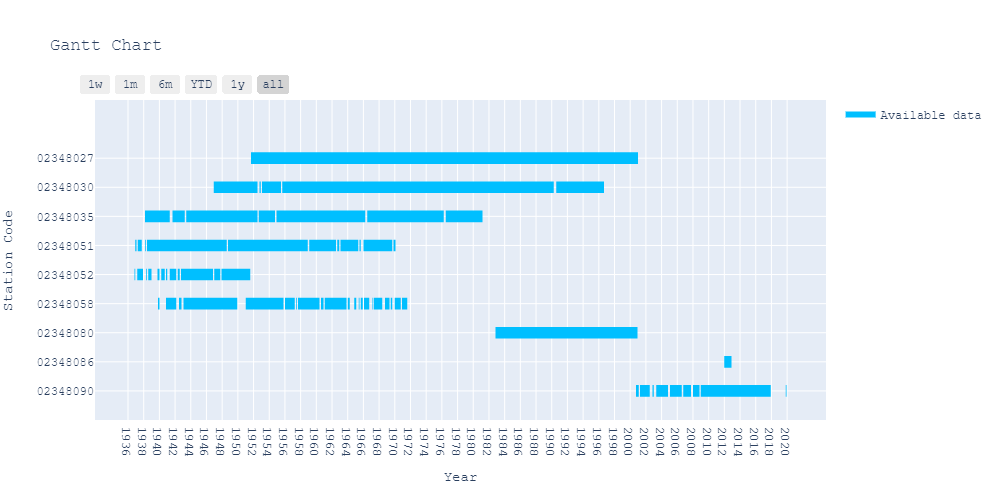

In [ ]:

imagem = Image.open('/content/newplot.png')
imagem

Step 10: sorting all data from all rainfall stations.

---------------------------------------------------------

Passo 10: ordenando todos os dados de todas as estações de precipitação.

In [ ]:

data_stations_index = data_stations.reset_index()
data_stations_index

,index,02348027,02348030,02348035,02348051,02348052,02348058,02348080,02348086,02348090
0,1936-11-01,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,1936-11-02,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,1936-11-03,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,1936-11-04,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,1936-11-05,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
30371,2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
30372,2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
30373,2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
30374,2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


Step 11: Preparation of the database for the generation of the rainfall graph in mm/day.

-----------------------------------------------------------------------

Passo 11: preparação da base de dados para a geração do gráfico de precipitação de mm/dia.

In [ ]:

data_stations_melt = pd.melt(data_stations_index, id_vars='index',
                             value_vars=codigo_estaçao, var_name='Estacoes', value_name='Precipitacao')
data_stations_melt

,index,Estacoes,Precipitacao
0,1936-11-01,02348027,NaN
1,1936-11-02,02348027,NaN
2,1936-11-03,02348027,NaN
3,1936-11-04,02348027,NaN
4,1936-11-05,02348027,NaN
...,...,...,...
273379,2019-12-27,02348090,0.0
273380,2019-12-28,02348090,0.0
273381,2019-12-29,02348090,0.0
273382,2019-12-30,02348090,0.0


Step 12: In the graph in question, it is possible to observe that according to all the selected stations, we have data in mm/day in a period ranging from 1936 to 2019, with some anomaly peaks represented by different stations in different periods. Also noteworthy is the importance in periods when there is no precipitation data in any of the stations. With this machine learning resource, it is possible to know which seasons and periods have better information about precipitation related data, but also fluviometric data of stations.

-----------------------------------------------------------------------

Passo 12: No gráfico em questão e possível observar que de acordo com todas as estações selecionadas, temos dados em mm/dia em um período que compreende de 1936 a 2019, sendo que há alguns picos de anomalia representados por estações diferentes em períodos diferentes. Destaca-se também a importancia em períodos que não há dados de precipitação em nenhuma das estações. Com este recurso de aprendizagem de máquina, é possível sabermos quais estações e períodos possuem meelhores informações sobre dados relacionados a precipitação, mas também dados flúviomêtricos de estações.

Text(0, 0.5, 'Precipitação mm/dia')

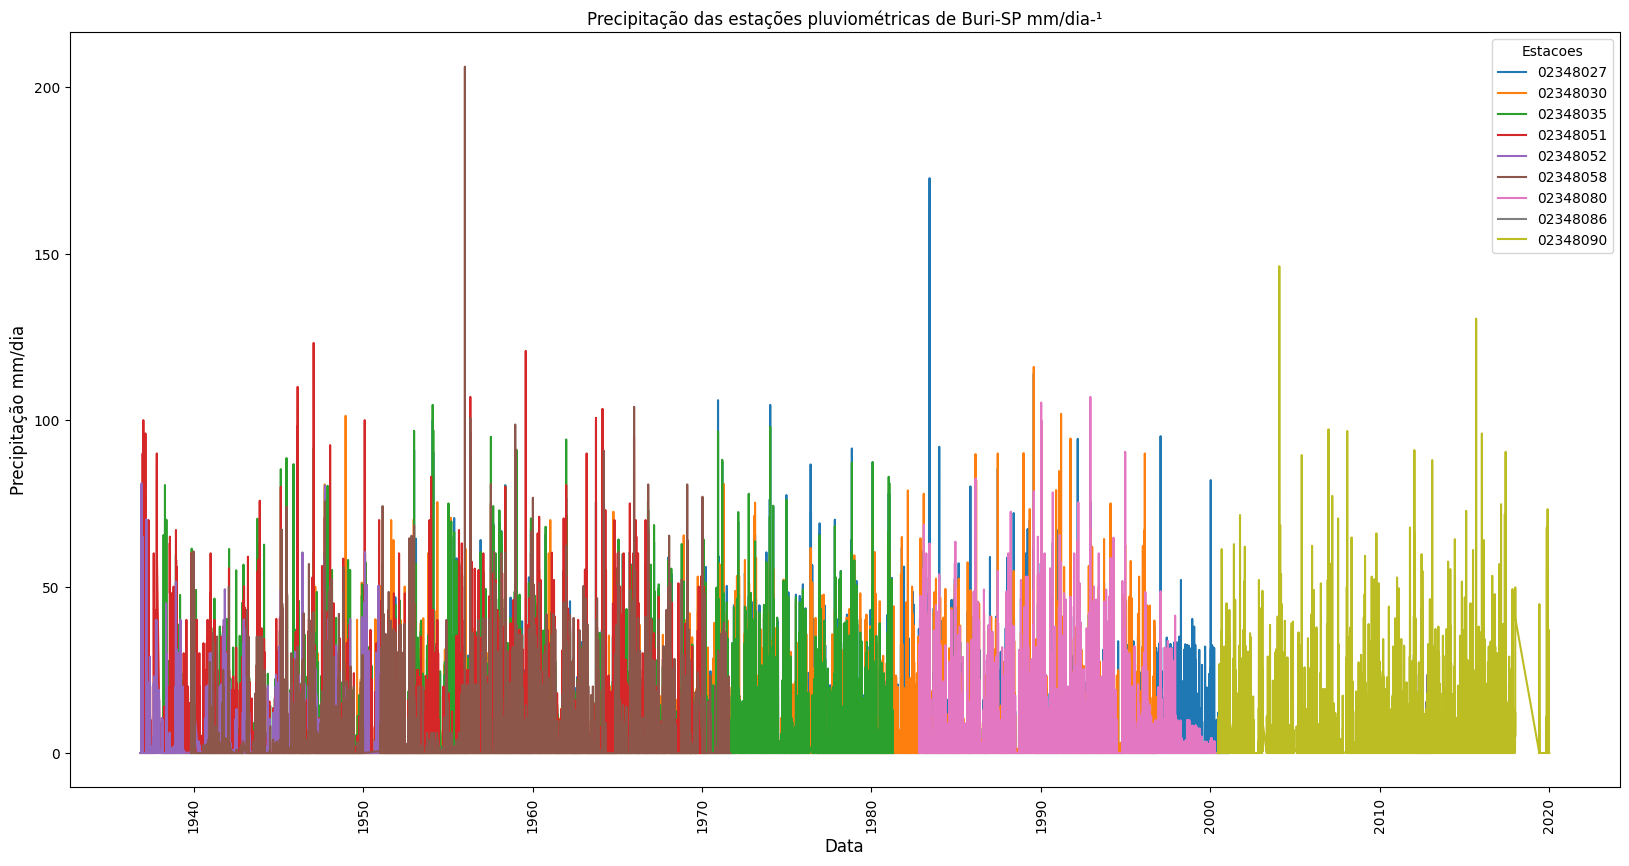

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(20, 10), dpi = 100)
from matplotlib import rc
rc('mathtext', default='regular')
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

sns.lineplot(x='index', y='Precipitacao', hue='Estacoes', data=data_stations_melt)\
  .set(title='Precipitação das estações pluviométricas de Buri-SP mm/dia-¹')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Precipitação mm/dia', fontsize=12)

`fonte: Wallisson Moreira de Carvalho. (2020, July 5). HydroBr: A Python package to work with Brazilian hydrometeorological time series. (Version 0.1.1). Zenodo. http://doi.org/10.5281/zenodo.3931027`

###Exemplo 2: Baixando dados de uma estação.

---


Example 2: Downloading data from a station.
---



In [ ]:
import numpy as np
from datetime import date
!pip install --upgrade geopandas
!pip install --upgrade rasterio
!pip install --upgrade rasterstats
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show
import os
from rasterstats import zonal_stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 38.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 33.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.8/136.8 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 31.3 MB/s eta 0:00:00
  Attempting uninstall: fiona
    Found existing installation: Fiona 1.9.1
    Uninstalling Fiona-1.9.1:
      Successfully uninstalled Fiona-1.9.1


Step 1: Obtaining data from all stations related to the municipality of Buri-SP, where it is possible to observe that there are data between the period from 1936 to 2019, with nine stations distributed in the city.

--------------------
Passo 1: Obtenção dos dados de todas as estações relacionadas ao municipio de Buri-SP, onde é possivel observar que há dados entre o periodo de 1936 até 2019, sendo nove estações distribuidas na cidade.

In [ ]:
data_stations

,02348027,02348030,02348035,02348051,02348052,02348058,02348080,02348086,02348090
1936-11-01,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1936-11-02,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1936-11-03,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1936-11-04,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1936-11-05,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


Step 2: selected the desired station, we will create a dataframe with all the data present.

-------------------
Passo 2: selecionada a estação desejada, criaremos um dataframe com todos os dados presentes.

In [ ]:
df = pd.DataFrame({
    '02348090': data_stations['02348090'].values
})
display(df)

,02348090
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
30371,0.0
30372,0.0
30373,0.0
30374,0.0


Step 3: For this step, values that are described as 'NUN' will be discarded, since values of this type correspond before the measurement of the station, where this starts in the period of 2000.

---------------------
Passo 3: Para esta etapa, será feito um descarte de valores que são descritos como 'NUN', visto que valores desse tipo correspondem antes da medição da estação, onde esta começa no período de 2000.

In [ ]:
data = df[df['02348090'].notna()].astype(float)
#print("DataFrame after removing rows with NaN value in Income Field:")
print(data)

       02348090
23227      0.00
23248      0.25
23249     11.00
23250      0.00
23251      0.00
...         ...
30371      0.00
30372      0.00
30373      0.00
30374      0.00
30375      0.00

[5943 rows x 1 columns]


Step 4: To carry out the following steps, it is necessary that the above output be converted into a dataframe.

-------------------------
Passo 4: Para realização das etapas seguintes, é necessário que o output acima seja convertido em um dataframe.

In [ ]:
df2 = pd.Series(data['02348090'])
display(df2.to_frame(name='mm/dia'))

,mm/dia
23227,0.00
23248,0.25
23249,11.00
23250,0.00
23251,0.00
...,...
30371,0.00
30372,0.00
30373,0.00
30374,0.00


Step 5: With the output ID described above; for this step, the values corresponding to the period from 2000 to 2019 are extracted using the iloc function.

------------------------
Passo 5: Com a ID do output acima descrita; para esta etapa é realizada a extração dos valores que correspondem o periodo de 2000 a 2019 com a função iloc. 

In [ ]:
extract_rown = data_stations.iloc[23227:30376]
extract_rown

,02348027,02348030,02348035,02348051,02348052,02348058,02348080,02348086,02348090
2000-06-05,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
2000-06-06,0.1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2000-06-07,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2000-06-08,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2000-06-09,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


Step 6: In this step, the above output is exported to xlsx, where after importing, it will be necessary to delete the columns that are not necessary, leaving only column '02348090'.

----------------------
Passo 6: Nesta etapa e realizada a exportação do output acima para xlsx, onde após a importação, será necessario excluir as colunas que não são necessarias, permanecendo apenas a coluna '02348090'.

In [ ]:
file_name3 = 'data_station2.xlsx'
extract_rown.to_excel(file_name3)

Step 7: In this step, the column already edited will be imported into google drive, with only the columns 'date' and '02348090'.

-----------------------------------
Passo 7: Nesta etapa, será feita a importação para o googledrive, da coluna já editada apenas com as colunas 'date' e '02348090'.

In [ ]:
dates2 = pd.read_excel('/content/data_station2.xlsx')
dates2

,Unnamed: 0,02348027,02348030,02348035,02348051,02348052,02348058,02348080,02348086,02348090
0,2000-06-05,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
1,2000-06-06,0.1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,2000-06-07,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,2000-06-08,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,2000-06-09,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7144,2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7145,2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7146,2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7147,2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


Step 8: In this step, a graph will be plotted that represents the precipitated amount in the period that corresponds between 2000 and 2019.

------------------------
Passo 8: Nesta etapa será plotado um gráfico que representa a quantidade precipitada no período que corresponde entre 2000 a 2019.

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20, 10), dpi = 100)
rc('mathtext', default='regular')
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

sns.lineplot(x='Date', y='02348090', data=dates2)\
  .set(title='Precipitação Buri-SP mm/dia-¹')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Precipitação mm/dia', fontsize=12)

ValueError: ignored

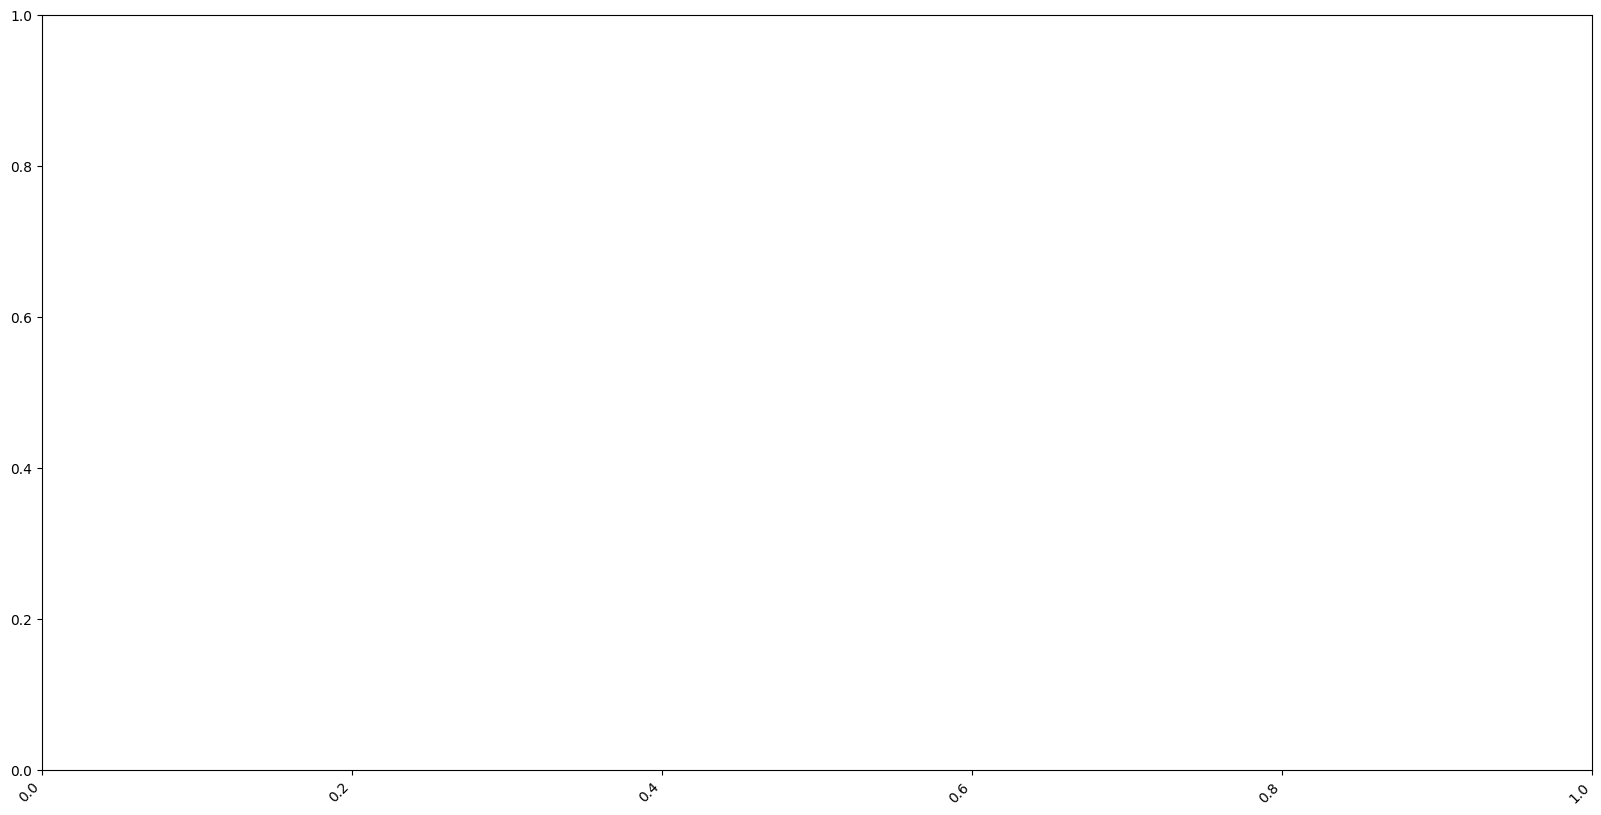

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20, 10), dpi = 100)
rc('mathtext', default='regular')
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

sns.barplot(x='Date', y='02348090', data=dates2)\
  .set(title='Precipitação Buri-SP mm/dia-¹')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Precipitação mm/dia', fontsize=12)
